<a href="https://colab.research.google.com/github/Karri-Tirumala-Venkatesh/Stock-Market-Analysis/blob/main/10th_Minute_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [479]:
import numpy as np
import pandas as pd

In [480]:
df = pd.read_csv("stock.csv")
df

,Datetime,Close,High,Low,Open,Volume
0,2025-03-12 09:15:00+05:30,1257.300049,1260.849976,1255.599976,1255.599976,0
1,2025-03-12 09:16:00+05:30,1257.699951,1258.050049,1255.849976,1257.099976,111216
2,2025-03-12 09:17:00+05:30,1258.800049,1259.400024,1257.000000,1257.699951,98288
3,2025-03-12 09:18:00+05:30,1259.300049,1259.849976,1258.050049,1258.550049,86064
4,2025-03-12 09:19:00+05:30,1258.400024,1260.750000,1258.300049,1259.199951,151129
...,...,...,...,...,...,...
369,2025-03-12 15:25:00+05:30,1256.099976,1257.000000,1256.050049,1256.949951,130011
370,2025-03-12 15:26:00+05:30,1256.400024,1256.449951,1256.000000,1256.099976,84387
371,2025-03-12 15:27:00+05:30,1256.500000,1257.300049,1256.050049,1256.400024,164784
372,2025-03-12 15:28:00+05:30,1256.199951,1256.550049,1256.099976,1256.550049,51283


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  374 non-null    object 
 1   Close     374 non-null    float64
 2   High      374 non-null    float64
 3   Low       374 non-null    float64
 4   Open      374 non-null    float64
 5   Volume    374 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 17.7+ KB


In [482]:
# Drop Datetime feature
df.drop("Datetime", axis=1, inplace=True)
df

,Close,High,Low,Open,Volume
0,1257.300049,1260.849976,1255.599976,1255.599976,0
1,1257.699951,1258.050049,1255.849976,1257.099976,111216
2,1258.800049,1259.400024,1257.000000,1257.699951,98288
3,1259.300049,1259.849976,1258.050049,1258.550049,86064
4,1258.400024,1260.750000,1258.300049,1259.199951,151129
...,...,...,...,...,...
369,1256.099976,1257.000000,1256.050049,1256.949951,130011
370,1256.400024,1256.449951,1256.000000,1256.099976,84387
371,1256.500000,1257.300049,1256.050049,1256.400024,164784
372,1256.199951,1256.550049,1256.099976,1256.550049,51283


In [483]:
df["Trend"] = np.where(df["Close"] > df["Open"], 1, 0)
df

,Close,High,Low,Open,Volume,Trend
0,1257.300049,1260.849976,1255.599976,1255.599976,0,1
1,1257.699951,1258.050049,1255.849976,1257.099976,111216,1
2,1258.800049,1259.400024,1257.000000,1257.699951,98288,1
3,1259.300049,1259.849976,1258.050049,1258.550049,86064,1
4,1258.400024,1260.750000,1258.300049,1259.199951,151129,0
...,...,...,...,...,...,...
369,1256.099976,1257.000000,1256.050049,1256.949951,130011,0
370,1256.400024,1256.449951,1256.000000,1256.099976,84387,1
371,1256.500000,1257.300049,1256.050049,1256.400024,164784,1
372,1256.199951,1256.550049,1256.099976,1256.550049,51283,0


In [484]:
# Feature Engineering: Use past N minutes of trend, open, and close prices
N = 12  # Number of past minutes to consider
for i in range(1, N + 1):
    df[f'trend_lag_{i}'] = df['Trend'].shift(i)
    df[f'open_lag_{i}'] = df['Open'].shift(i)
    df[f'close_lag_{i}'] = df['Close'].shift(i)
    df[f'Volume_lag_{i}'] = df['Volume'].shift(i)
    df[f'High_lag_{i}'] = df['High'].shift(i)
    df[f'Low_lag_{i}'] = df['Low'].shift(i)

In [485]:
# Shift the Trend 10 up
df["Trend"] = df["Trend"].shift(-10)

In [486]:
df.dropna(inplace=True)

In [487]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(["Open", "Close", "High", "Low", "Volume","Trend"], axis=1)
y = df["Trend"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [488]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Train Random Forest with max depth to prevent overfitting
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
f = -15
important_features = X_train.columns[np.argsort(importances)[f:]]  # Keep top features
X_train1 = X_train[important_features]
X_test1 = X_test[important_features]

# Re-train with selected features
rf1 = RandomForestClassifier(n_estimators=300, max_depth=3, min_samples_split=13, random_state=42)
rf1.fit(X_train1, y_train)
y_pred = rf1.predict(X_test1)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Print important features
print("Important Features:", important_features)

Accuracy: 0.6901408450704225
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72        40
         1.0       0.64      0.68      0.66        31

    accuracy                           0.69        71
   macro avg       0.69      0.69      0.69        71
weighted avg       0.69      0.69      0.69        71

Important Features: Index(['Volume_lag_5', 'open_lag_7', 'Low_lag_12', 'close_lag_1',
       'Volume_lag_6', 'Volume_lag_9', 'Volume_lag_10', 'Volume_lag_3',
       'Volume_lag_2', 'Volume_lag_4', 'Volume_lag_8', 'Volume_lag_12',
       'Volume_lag_7', 'Volume_lag_1', 'Volume_lag_11'],
      dtype='object')


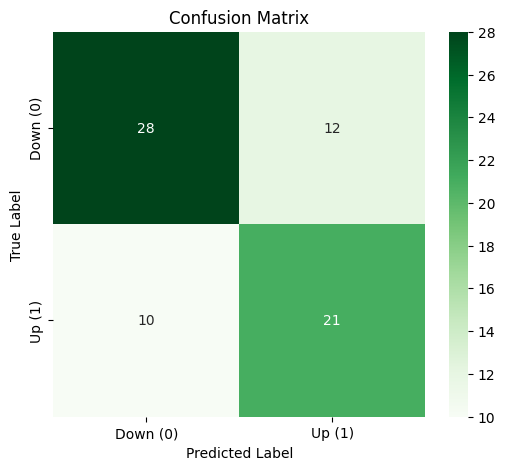

In [489]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Down (0)", "Up (1)"], yticklabels=["Down (0)", "Up (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()